## Japan_Used_Cars_Price_Prediction

### Importing the Dataset

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [227]:
df=pd.read_csv(r'C:\Users\Dell\Documents\usedcars_price.csv')

In [192]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [193]:
df.shape

(2318, 11)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


In [195]:
df.dtypes

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

- From the data types we find that mark,model,transmission,drive,hand_drive,fuel are categorical data
- The remaining id,price,year,mileage,engine_capacity are continuous data.
- Here the traget variable is 'price' which is a continuous variable hence this is a regression problem statement.

In [196]:
df.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


- Maximum number of miles travelled by the vehicle is 790000 and minimum is 2000
- The maximum measurement of the total volume of the cylinders in the engine i.e., engine_capacity is 12340 and minimum is 9.

In [197]:
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

- There is no null data in any of the columns.

In [198]:
# checking the distribution of categorical data

print(df.fuel.value_counts())

gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64


- There are more gasoline vehicles

In [199]:
print(df.transmission.value_counts())

at     2171
mt      117
cvt      30
Name: transmission, dtype: int64


- Automated Transmission(at) is the mostly used gear box in the vehicles.

In [200]:
print(df.drive.value_counts())

2wd    2121
4wd     192
awd       5
Name: drive, dtype: int64


- Two-Wheel-Drive(2wd) are the maximum number of cars

In [201]:
print(df.hand_drive.value_counts())

rhd       2301
lhd         16
center       1
Name: hand_drive, dtype: int64


- rhd cars are maximum in number

### Visualizing the Data

###### Univariate Analysis

- We are going to check the distribution and representation of different variables individually.

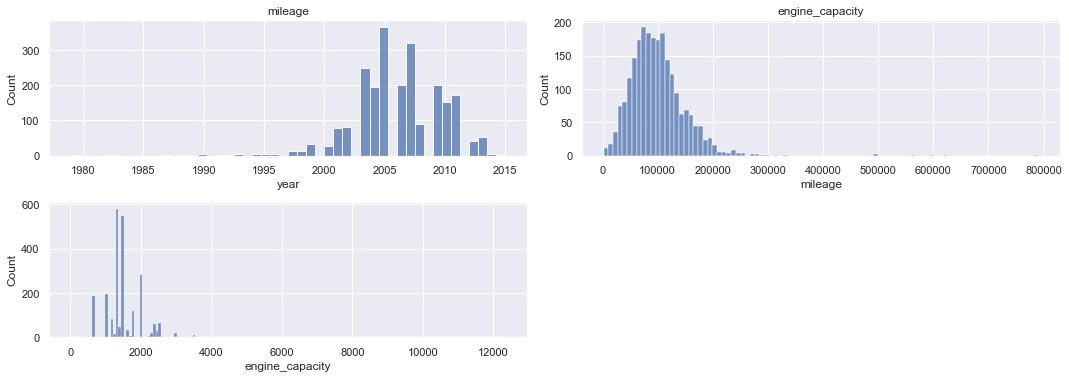

In [202]:
num_cols = ["year","mileage","engine_capacity"]
plt.figure(figsize=(15,10))
for index,i in enumerate(num_cols):
    plt.title(i)
    plt.tight_layout()
    plt.subplot(4,2,index+1)
    sns.histplot(df[i])

- Maximum number of vehicles are registered in the year 2005


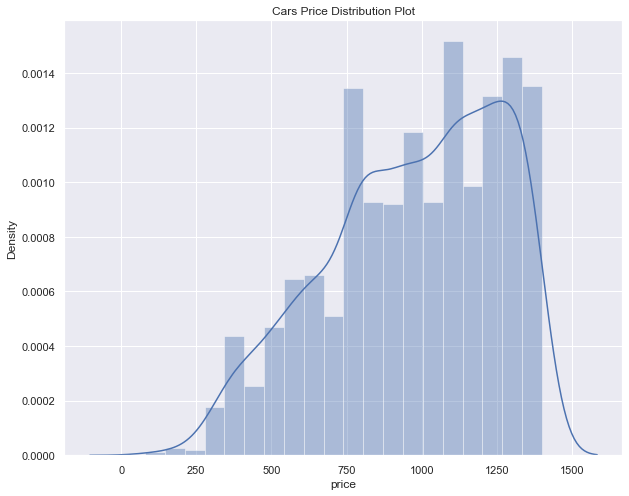

In [203]:
plt.figure(figsize=(10,8))

plt.subplot(1,1,1)
plt.title('Cars Price Distribution Plot')
sns.distplot(df.price)

plt.show()

- From the above distribution plot, we infer that it is right-skewed. It means that the most prices in the dataset are low i.e., below 1500

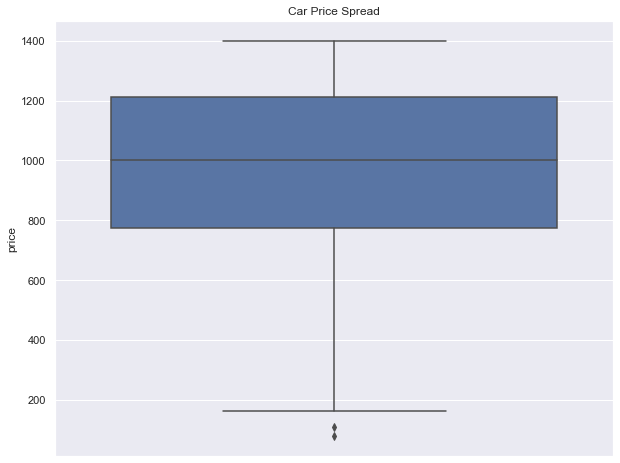

In [204]:
plt.figure(figsize=(10,8))
plt.subplot(1,1,1)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

- There are a group of cars whose prices are very high.
- These could be premium brand vehicles.
- These prices have been identified as outliers


In [205]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    2318.000000
mean      971.522433
std       288.673112
min        80.000000
25%       776.000000
50%      1000.000000
75%      1213.000000
85%      1300.000000
90%      1320.000000
100%     1400.000000
max      1400.000000
Name: price, dtype: float64


- From the above description,we find that the data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 1300, whereas the remaining 15% are between 1300 and 1400).

###### Bivariate Analysis

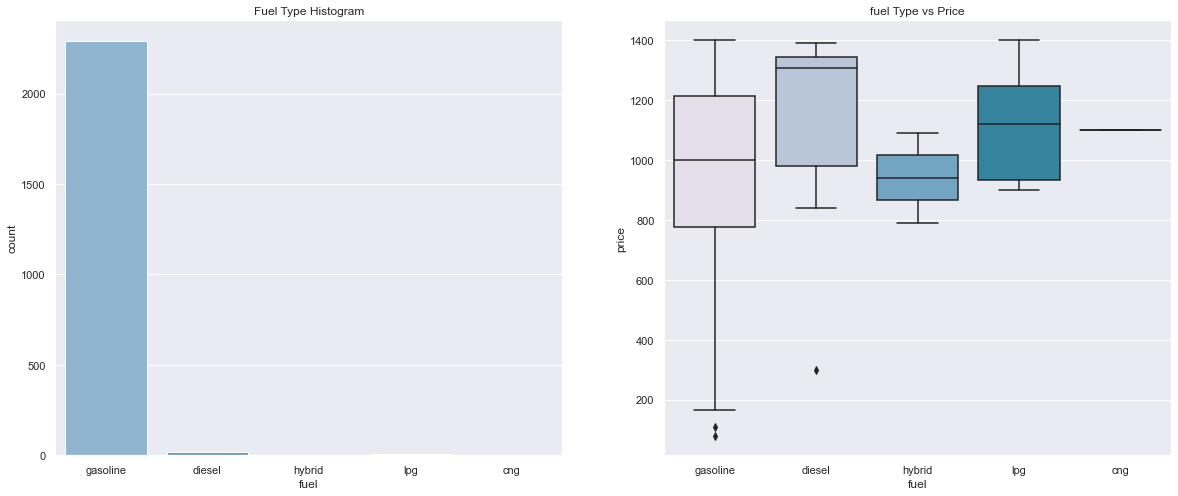

In [206]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(df.fuel, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('fuel Type vs Price')
sns.boxplot(x=df.fuel, y=df.price, palette=("PuBuGn"))
plt.show()

- From the above histogram plot, we find that more vehicles are gasoline vehicles.
- From the box plot of fuel type vs price, we find that there are a very few outliers in the gasoline type vehicles.

<Figure size 720x576 with 0 Axes>

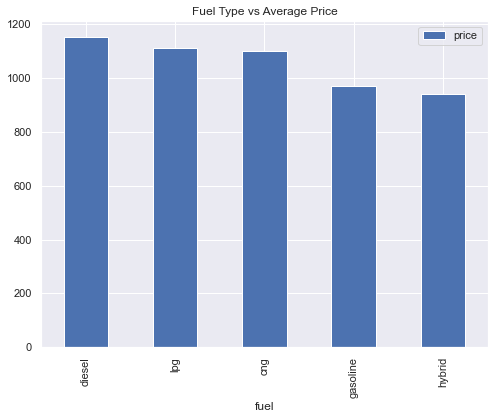

In [271]:
plt.figure(figsize=(10,8))

df1 = pd.DataFrame(df.groupby(['fuel'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Fuel Type vs Average Price')
plt.show()



- From the above bar plot of fuel type vs average price, we find that diesel cars are costly and they have average price greater than gasoline cars.

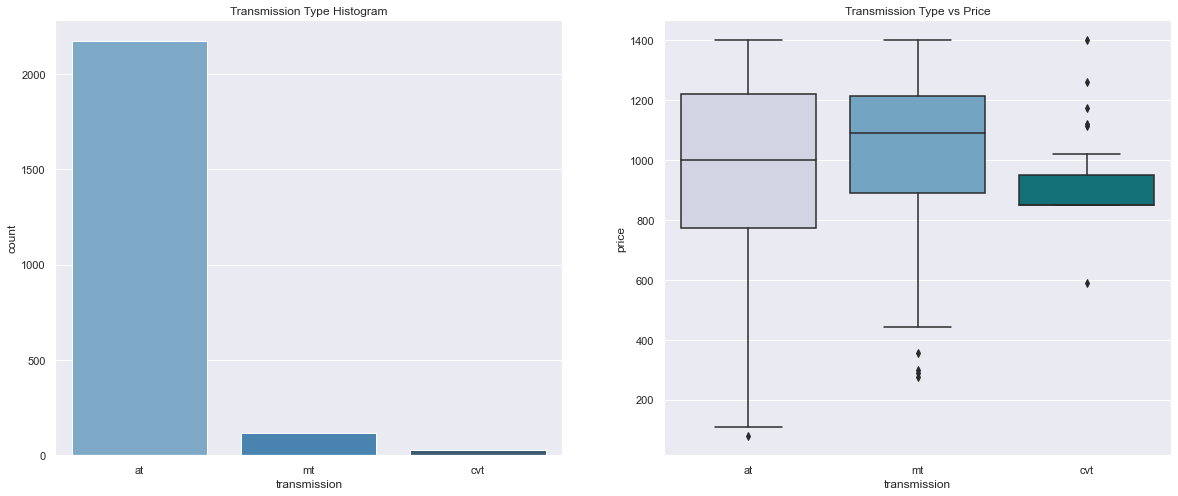

In [216]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Transmission Type Histogram')
sns.countplot(df.transmission, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Transmission Type vs Price')
sns.boxplot(x=df.transmission, y=df.price, palette=("PuBuGn"))
plt.show()

- From the above box plot, we find that there are few outliers in the transmission vs price

<Figure size 720x576 with 0 Axes>

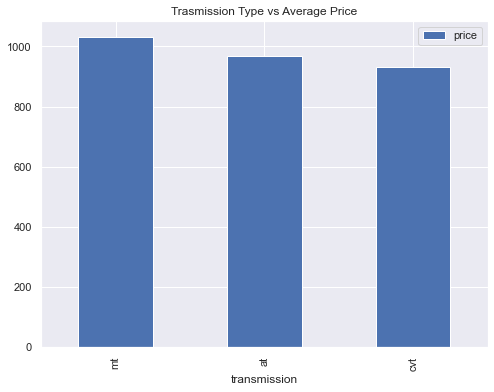

In [272]:
plt.figure(figsize=(10,8))

df1 = pd.DataFrame(df.groupby(['transmission'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Trasmission Type vs Average Price')
plt.show()


- From the above bar plot, we find that rmt transmission(gear box type) vehicles have greater average price that at transmission vehicles.

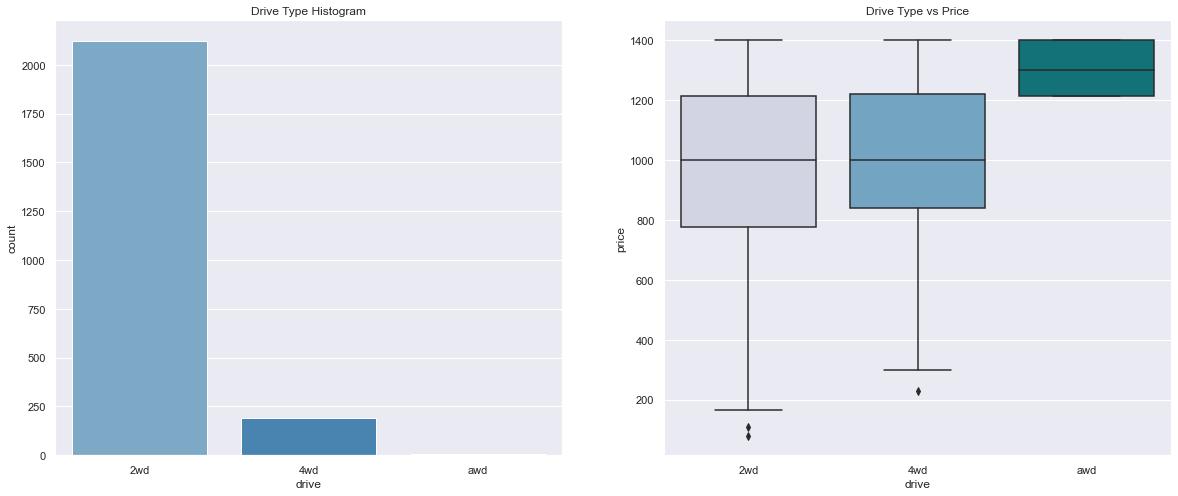

In [220]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Drive Type Histogram')
sns.countplot(df.drive, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Drive Type vs Price')
sns.boxplot(x=df.drive, y=df.price, palette=("PuBuGn"))
plt.show()

<Figure size 720x576 with 0 Axes>

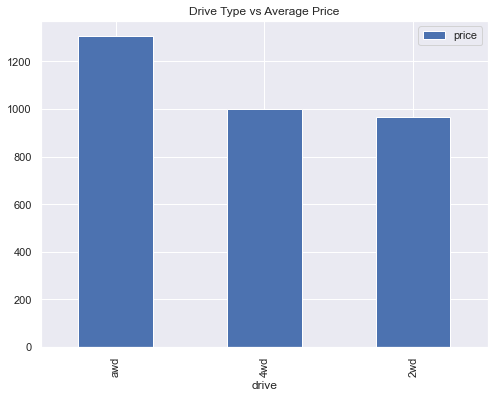

In [273]:
plt.figure(figsize=(10,8))

df1 = pd.DataFrame(df.groupby(['drive'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Drive Type vs Average Price')
plt.show()


- From the above three plots, we infer that 2wd vehicles are more in number but the average price of awd vehicles is greater than the 2wd vehicles. 
- 2wd vehicles have least average price.

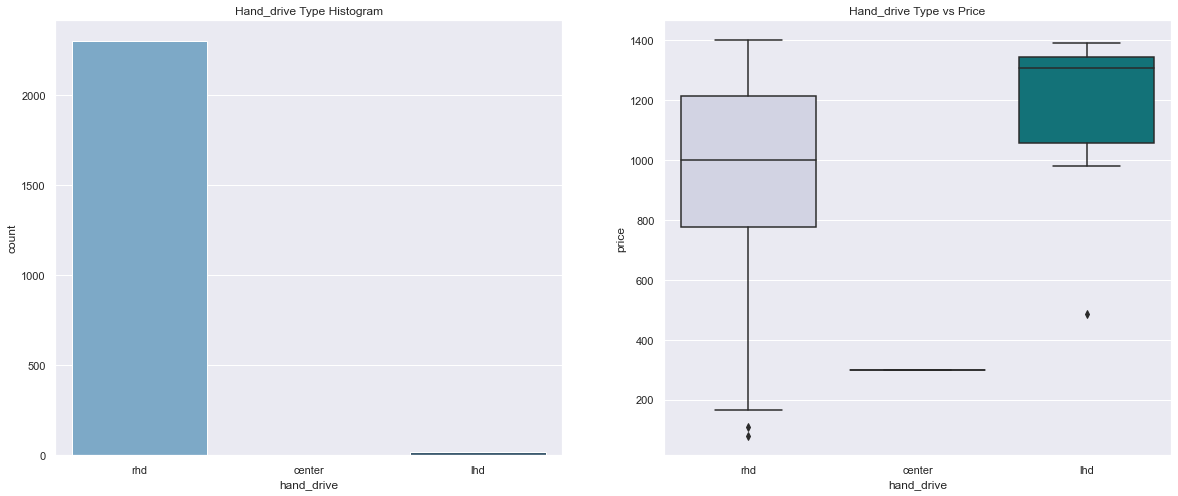

In [224]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Hand_drive Type Histogram')
sns.countplot(df.hand_drive, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Hand_drive Type vs Price')
sns.boxplot(x=df.hand_drive, y=df.price, palette=("PuBuGn"))
plt.show()

<Figure size 720x576 with 0 Axes>

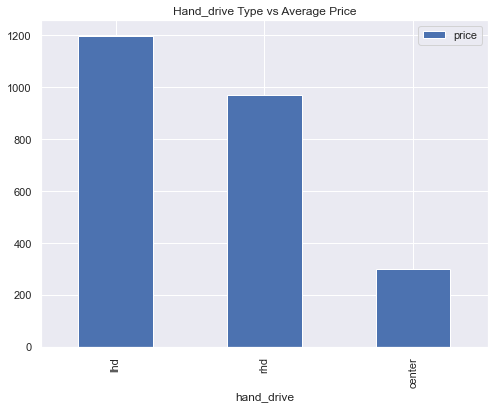

In [274]:
plt.figure(figsize=(10,8))

df1 = pd.DataFrame(df.groupby(['hand_drive'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Hand_drive Type vs Average Price')
plt.show()

- From the above three plots, we infer that rhd vehicles are more in number but their average price is lesser than the lhd vehicles.

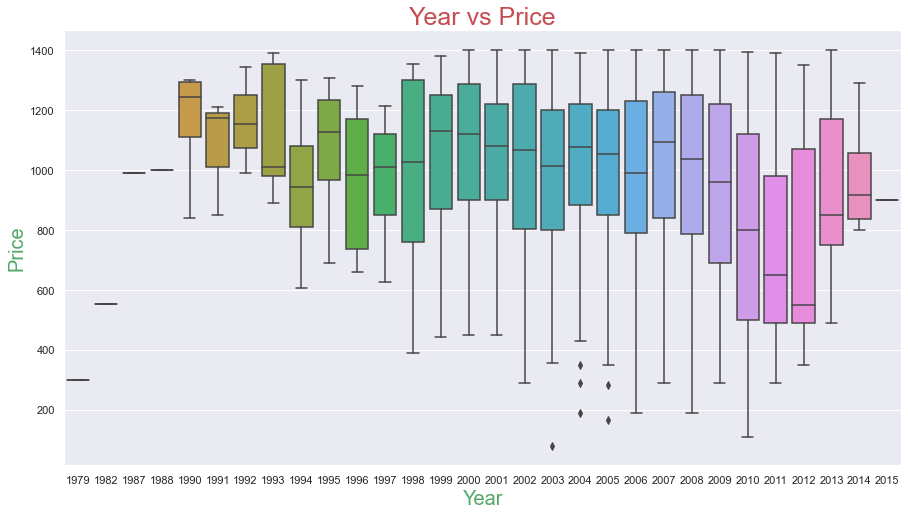

In [228]:
#Year vs Price

plt.figure(figsize=(15,8))
sns.boxplot(data=df,x="year",y="price")
plt.xlabel("Year",size=20,c="g")
plt.ylabel("Price",size=20,c="g")
plt.title("Year vs Price",size=25,c="r")
plt.show()


- so clearly seen that as car become older its price get reduces
- Year of car is imp to predict output

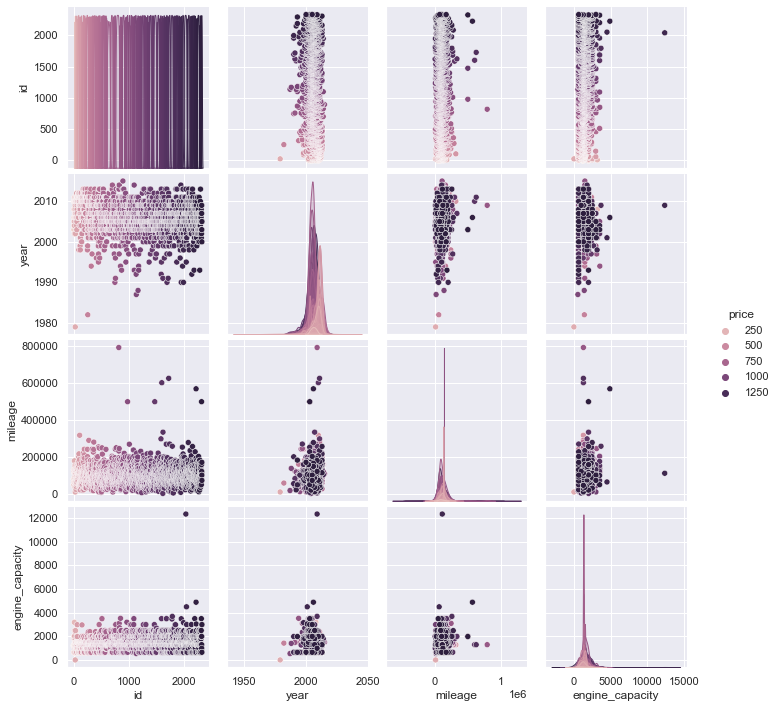

In [229]:
sns.pairplot(data=df, hue='price',diag_kind = 'kde')

- Mileage seem to have positive correlation with price means highest mileage vehicles are having higherprice.
- Same is the case with year, the recent year vehicles have higher price.

In [230]:
# Calculate the age of the car

df['age'] = 2022- df['year']
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,age
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,19
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,12
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,17
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,14
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,16


In [231]:
# All numeric variables in the dataset

df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,id,price,year,mileage,engine_capacity,age
0,0,80,2003,80000,1240,19
1,1,110,2010,53000,1200,12
2,2,165,2005,47690,2000,17
3,3,190,2008,130661,1990,14
4,4,190,2006,66300,660,16


In [232]:
# Correlation matrix

cor = df_numeric.corr()
cor

,id,price,year,mileage,engine_capacity,age
id,1.000000,0.985100,-0.188326,0.028091,0.169773,0.188326
price,0.985100,1.000000,-0.211092,0.021581,0.173748,0.211092
year,-0.188326,-0.211092,1.000000,0.086065,-0.142460,-1.000000
mileage,0.028091,0.021581,0.086065,1.000000,0.130362,-0.086065
engine_capacity,0.169773,0.173748,-0.142460,0.130362,1.000000,0.142460
age,0.188326,0.211092,-1.000000,-0.086065,0.142460,1.000000


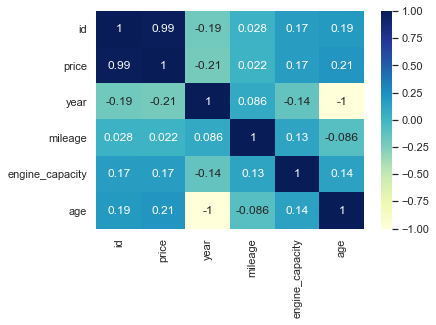

In [233]:
# Heatmap

sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

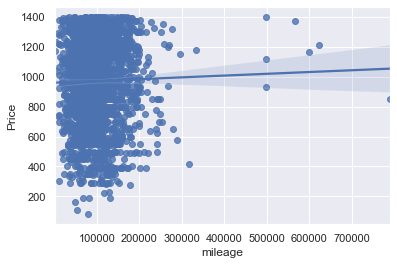

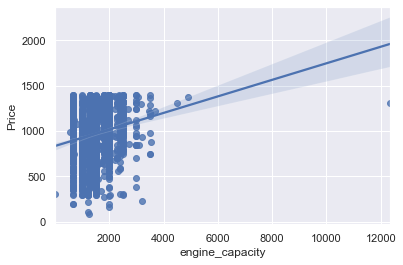

In [234]:
columns = ['mileage','engine_capacity']
for i in columns:
    plt.figure()
    sns.regplot(df[i],df.price)
    plt.xlabel(i)
    plt.ylabel("Price")




- Price of the car has a very positive and strong relationship with engine_capacity of the car. Higher the engine_capacity, higher the price of cars.

- There also appears to be a weak but visible positive relationship between mileage and price. If the car provides more mileage its price increases. 


Converting categorical columns

In [252]:
varlist = ['fuel','transmission','drive','hand_drive','mark','model']
X=df[varlist].copy()

- Using one hot encoder to encode the categorical columns

In [275]:
from sklearn.preprocessing import OneHotEncoder
fuel_en = OneHotEncoder().fit(X[['fuel']])
X_fuel = pd.DataFrame(fuel_en.transform(X[['fuel']]).toarray(), columns=fuel_en.categories_)

In [276]:
transmission_en = OneHotEncoder().fit(X[['transmission']])
X_transmission = pd.DataFrame(transmission_en.transform(X[['transmission']]).toarray(), columns=transmission_en.categories_)

In [277]:
drive_en = OneHotEncoder().fit(X[['drive']])
X_drive = pd.DataFrame(drive_en.transform(X[['drive']]).toarray(), columns=drive_en.categories_)

In [278]:
handdrive_en = OneHotEncoder().fit(X[['hand_drive']])
X_handdrive = pd.DataFrame(handdrive_en.transform(X[['hand_drive']]).toarray(), columns=handdrive_en.categories_)

In [279]:
mark_en = OneHotEncoder().fit(X[['mark']])
X_mark = pd.DataFrame(mark_en.transform(X[['mark']]).toarray(), columns=mark_en.categories_)

In [280]:
model_en = OneHotEncoder().fit(X[['model']])
X_model = pd.DataFrame(model_en.transform(X[['model']]).toarray(), columns=model_en.categories_)

In [281]:
X_final = pd.concat([X_transmission,X_fuel, X_drive, X_handdrive,X_mark,X_model], axis=1)

In [282]:
X_final.dropna(inplace=True)

<AxesSubplot:>

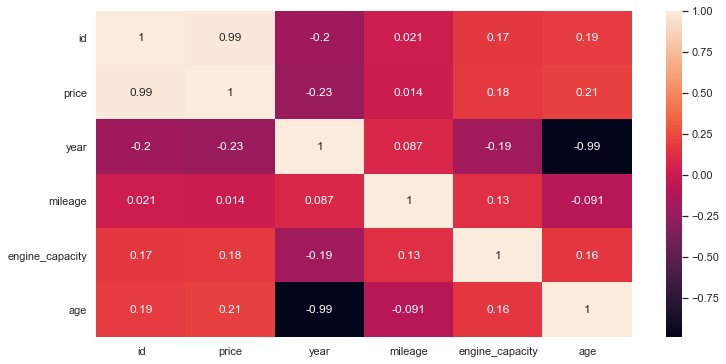

In [283]:
corr = df.corr()
plt.subplots(figsize=(12,6))
sns.heatmap(corr, annot=True)

##### Cleaning the Outliers in Numerical Data
- We can detect the outliers with many different ways, such as:
     - Z-Score
     - IQR
     - Percentile
- But we will use Z-Score in this case.

In [284]:
num_columns=['price','year','mileage','engine_capacity']

In [285]:
#function to cleaning outliers that has a position higher than 3 in z-score
def z_score(column, df):
    threshold = 3                                                     
    mean = df[column].mean()       
    std  = df[column].std()        
    for data in df[column]:
        z_score = (data-mean)/std  #our Z-Score
        if z_score>threshold:       
            df.loc[df[column] == data, column] = (threshold*std)+mean 
        elif z_score<-threshold:
            df.loc[df[column] == data, column] = (-threshold*std)+mean 
    return df

In [286]:
for column in num_columns:      
    z_score(column, df)

In [287]:
df.describe()

,id,price,year,mileage,engine_capacity,age
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.533484,2006.021298,98655.174957,1497.713183,16.027610
std,674.460724,288.639458,3.505772,44526.882211,482.210856,3.698863
min,0.000000,105.615107,1995.495499,2000.000000,48.352055,7.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000,13.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000,16.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000,18.000000
max,2335.000000,1400.000000,2015.000000,232568.298432,2947.720137,43.000000


### Building the models

In [364]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.svm import SVR 
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [292]:
df_1=pd.concat((df_numeric,X_final),axis=1)
df_1.shape

(2318, 306)

In [293]:
X_final.shape

(2318, 300)

In [294]:
#Splitting the data into train and test
x = df_1.drop(['price'], axis = 1)
y = df_1['price']

In [355]:
#Fitting the data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### 1. Linear regression

In [356]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [357]:
# prediction on Training data
lr_train_pred = lr.predict(x_train)

# R squared Error
error_score = metrics.r2_score(y_train, lr_train_pred)
print("R squared Error for training : ", error_score)

R squared Error for training :  0.980100150935609


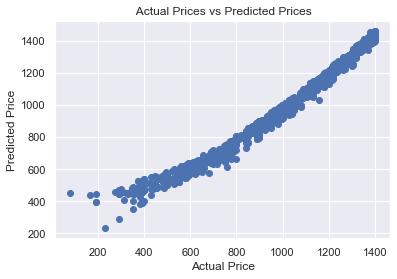

In [358]:
#scatter plot for vizualising the actual prices and predicted prices of trained data
plt.scatter(y_train, lr_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [359]:
# prediction on Testing data

lr_test_pred = lr.predict(x_test)
# R squared Error
error_score = metrics.r2_score(y_test,lr_test_pred)
print("R squared Error for testing : ", error_score)

R squared Error for testing :  -13.404568038170337


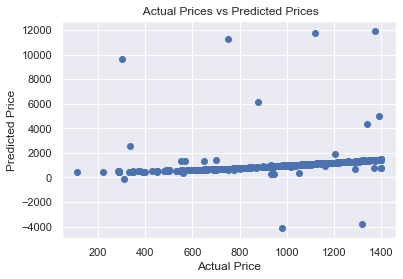

In [360]:
#scatter plot for vizualisisng the actual prices and predicted prices of testing data
plt.scatter(y_test, lr_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [361]:
print("Model training score:",lr.score(x_train,y_train)*100,'%')
print('Model Testing Score:',lr.score(x_test, y_test)*100,'%')
print('MSE:',mean_squared_error(y_test,lr_test_pred))
print("RMSE: ",mean_squared_error(y_test, lr_test_pred, squared=False))

Model training score: 98.0100150935609 %
Model Testing Score: -1340.4568038170337 %
MSE: 1154133.6422511926
RMSE:  1074.3061212946675


#### 2. Random Forest Regressor

In [308]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [309]:
# prediction on Training data
rf_train_pred = rf.predict(x_train)

# R squared Error
error_score = metrics.r2_score(y_train, rf_train_pred)
print("R squared Error for training : ", error_score)

R squared Error for training :  0.9999865202561682


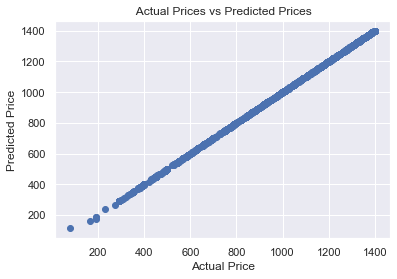

In [312]:
#scatter plot for vizualising the actual prices and predicted prices of trained data
plt.scatter(y_train,rf_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [314]:
# prediction on Testing data

rf_test_pred = rf.predict(x_test)
# R squared Error
error_score = metrics.r2_score(y_test,rf_test_pred)
print("R squared Error for testing : ", error_score)

R squared Error for testing :  0.999924256773305


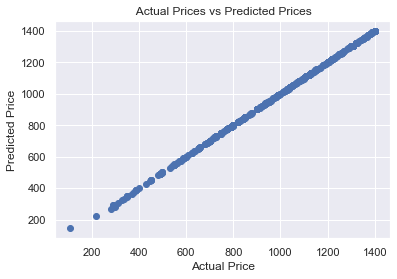

In [315]:
#scatter plot for vizualisisng the actual prices and predicted prices of testing data
plt.scatter(y_test, rf_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [316]:
print("Model training score:",rf.score(x_train,y_train)*100,'%')
print('Model Testing Score:',rf.score(x_test, y_test)*100,'%')
print('MSE:',mean_squared_error(y_test,rf_test_pred))
print("RMSE: ",mean_squared_error(y_test, rf_test_pred, squared=False))

Model training score: 99.99865202561682 %
Model Testing Score: 99.9924256773305 %
MSE: 6.06875581896552
RMSE:  2.4634844872589556


#### 3.KNeighbor Regressor

In [317]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [318]:
# prediction on Training data
knn_train_pred = knn.predict(x_train)

# R squared Error
error_score = metrics.r2_score(y_train, knn_train_pred)
print("R squared Error for training: ", error_score)

R squared Error for training:  0.8764900880240278


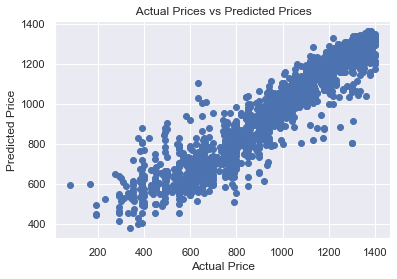

In [319]:
#scatter plot for vizualising the actual prices and predicted prices of trained data
plt.scatter(y_train,knn_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [320]:
# prediction on Testing data

knn_test_pred = knn.predict(x_test)
# R squared Error
error_score = metrics.r2_score(y_test,knn_test_pred)
print("R squared Error for testing : ", error_score)

R squared Error for testing :  0.7855768704064506


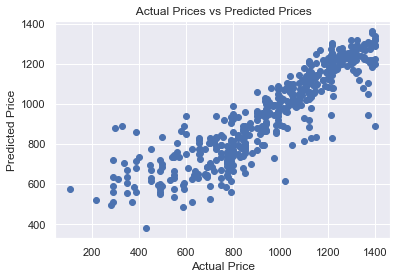

In [322]:
#scatter plot for vizualisisng the actual prices and predicted prices of testing data
plt.scatter(y_test, knn_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [324]:
print("Model training score:",knn.score(x_train,y_train)*100,'%')
print('Model Testing Score:',knn.score(x_test, y_test)*100,'%')
print('MSE:',mean_squared_error(y_test,knn_test_pred))
print("RMSE: ",mean_squared_error(y_test, knn_test_pred, squared=False))

Model training score: 87.64900880240279 %
Model Testing Score: 78.55768704064506 %
MSE: 17180.171379310348
RMSE:  131.07315277855471


####  4.Decision Tree Regressor

In [327]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [328]:
# prediction on Training data
dt_train_pred = dt.predict(x_train)

# R squared Error
error_score = metrics.r2_score(y_train, dt_train_pred)
print("R squared Error for training: ", error_score)

R squared Error for training:  1.0


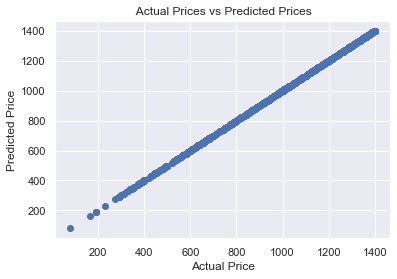

In [329]:
#scatter plot for vizualising the actual prices and predicted prices of trained data
plt.scatter(y_train,dt_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [330]:
# prediction on Testing data

dt_test_pred = dt.predict(x_test)
# R squared Error
error_score = metrics.r2_score(y_test,dt_test_pred)
print("R squared Error for testing : ", error_score)

R squared Error for testing :  0.9998782579227538


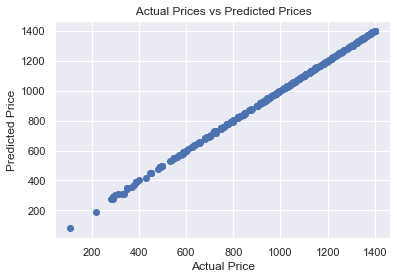

In [331]:
#scatter plot for vizualisisng the actual prices and predicted prices of testing data
plt.scatter(y_test, dt_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [332]:
print("Model training score:",dt.score(x_train,y_train)*100,'%')
print('Model Testing Score:',dt.score(x_test, y_test)*100,'%')
print('MSE:',mean_squared_error(y_test,dt_test_pred))
print("RMSE: ",mean_squared_error(y_test, dt_test_pred, squared=False))

Model training score: 100.0 %
Model Testing Score: 99.98782579227537 %
MSE: 9.754310344827585
RMSE:  3.123189130492674


####  5.Support Vector Regressor 

In [334]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [335]:
# prediction on Training data
svr_train_pred = svr.predict(x_train)

# R squared Error
error_score = metrics.r2_score(y_train, svr_train_pred)
print("R squared Error for training: ", error_score)

R squared Error for training:  -0.010946860067424291


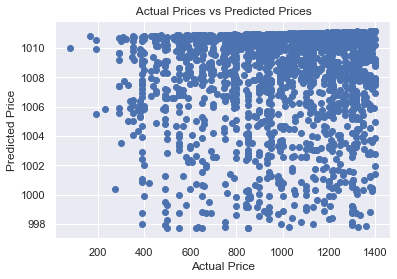

In [336]:
#scatter plot for vizualising the actual prices and predicted prices of trained data
plt.scatter(y_train,svr_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [337]:
# prediction on Testing data

svr_test_pred = svr.predict(x_test)
# R squared Error
error_score = metrics.r2_score(y_test,svr_test_pred)
print("R squared Error for testing : ", error_score)

R squared Error for testing :  -0.04253543319322284


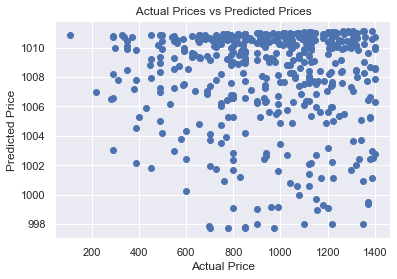

In [338]:
#scatter plot for vizualisisng the actual prices and predicted prices of testing data
plt.scatter(y_test, svr_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [339]:
print("Model training score:",svr.score(x_train,y_train)*100,'%')
print('Model Testing Score:',svr.score(x_test, y_test)*100,'%')
print('MSE:',mean_squared_error(y_test,svr_test_pred))
print("RMSE: ",mean_squared_error(y_test, svr_test_pred, squared=False))

Model training score: -1.094686006742429 %
Model Testing Score: -4.253543319322284 %
MSE: 83530.80866422513
RMSE:  289.0169695091019


Based on the 5 models created, we observe that,

- Support Vector Machine has the lowest performance on the training dataset i.e -0.0109 and on the testing dataset i.e., -0.04 in R2 whereas the Decision tree has the lowest performance in test dataset 0.79.
- The Decision Tree has reported the highest level of overfitting across all models
- Random Forest produced a near perfect performance on train data and good performance on test data. However, Random Forest model has also overfitted the model.
- K nearest neighbors has performed well on both dataset i.e 0.87 and 0.78, indicating the model is generalising well. 

#### HYPER-PARAMETER TUNING and VALIDATION ON KNN MODEL

In [365]:
parameters={"n_neighbors":[3,4,5,6,7,8,9,10],"metric":["minkowski","euclidean","manhattan","chebyshev"],
            "weights":["uniform","distance"]}
gridsearch=GridSearchCV(estimator=knn,param_grid=parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [368]:
knn1=KNeighborsRegressor(metric='manhattan', n_neighbors=4, weights='distance')
knn1.fit(x_train,y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=4, weights='distance')

In [370]:
# prediction on Training data
knn1_train_pred = knn1.predict(x_train)

# R squared Error
error_score = metrics.r2_score(y_train, knn1_train_pred)
print("R squared Error for training: ", error_score)

R squared Error for training:  1.0


In [372]:
# prediction on Testing data
knn1_test_pred = knn1.predict(x_test)

# R squared Error
error_score = metrics.r2_score(y_test, knn1_test_pred)
print("R squared Error for testing: ", error_score)

R squared Error for testing:  0.832889476832774


In [373]:
print("Model training score:",knn1.score(x_train,y_train)*100,'%')
print('Model Testing Score:',knn1.score(x_test, y_test)*100,'%')
print('MSE:',mean_squared_error(y_test,knn1_test_pred))
print("RMSE: ",mean_squared_error(y_test, knn1_test_pred, squared=False))

Model training score: 100.0 %
Model Testing Score: 83.2889476832774 %
MSE: 13389.35511640589
RMSE:  115.71238099877597


- On Using grid search, a set of best parameters were produced.
- Using the parameters, we created the knn model along with features produced.
- We gained a r2 of 1.0 on train and 0.83 on test, indicating the model is performing better with new parameters found.
- We also observe that accuracy of the model is improved.


- From the above all models, decision tree and random forest models have almost 99% accuracy. Considering them to be overfitted models, we conclude that kneighbors model is the best fit model with accuracy of 83.2%

In [374]:
#saving the model
import pickle
filename = 'Usedcarsprice.pkl'
pickle.dump(knn1, open(filename, 'wb'))

#### Conclusion

In [375]:
loaded_model=pickle.load(open('Usedcarsprice.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

83.2889476832774


In [377]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],knn1_test_pred[:]],index=['Predicted','Original'])

In [378]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,454,455,456,457,458,459,460,461,462,463
Predicted,1282.638031,838.968122,794.818678,1112.557303,769.119149,1178.27468,1001.598911,1161.911684,1112.762186,1291.903938,...,753.182071,1208.276868,1129.907695,993.255419,1079.068155,536.65196,1192.265462,1306.37778,752.588644,1252.82897
Original,1282.638031,838.968122,794.818678,1112.557303,769.119149,1178.27468,1001.598911,1161.911684,1112.762186,1291.903938,...,753.182071,1208.276868,1129.907695,993.255419,1079.068155,536.65196,1192.265462,1306.37778,752.588644,1252.82897
